In [1]:
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
print('tensorflow version: ',tf.__version__)

tensorflow version:  2.10.1


In [3]:
train_labels = []
train_samples = []

In [4]:
for i in range(50):
    # The ~5% of older individuals whow did experience side effects 
    random_younger = random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    # The ~5% of older individuals whow did not experience side effects
    random_older = random.randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals whow did not experience side effects
    random_younger = random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    # The ~95% of older individuals whow did experience side effects
    random_older = random.randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
print('train_samples: ')
for i in range(11):
    print(train_samples[i])

train_samples: 
18
66
35
95
19
84
46
74
60
85
39


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
print(scaled_train_samples)

[[0.85057471]
 [0.05747126]
 [0.14942529]
 ...
 [0.20689655]
 [0.13793103]
 [0.10344828]]


### tf.keras sequential Model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
# physical_devices= tf.config.experimental.list_physical_devices('GPU')
# print("Num GPU's Availabel: ",len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0],True)


In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()
print(train_samples.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
(2100,)


In [13]:
model1= model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
# from tqdm import tqdm
model1 = model.fit(x=scaled_train_samples,y=train_labels,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30


210/210 - 1s - loss: 0.7546 - accuracy: 0.4576 - 918ms/epoch - 4ms/step
Epoch 2/30
210/210 - 0s - loss: 0.7080 - accuracy: 0.4176 - 338ms/epoch - 2ms/step
Epoch 3/30
210/210 - 0s - loss: 0.6725 - accuracy: 0.7019 - 386ms/epoch - 2ms/step
Epoch 4/30
210/210 - 0s - loss: 0.6357 - accuracy: 0.7833 - 369ms/epoch - 2ms/step
Epoch 5/30
210/210 - 0s - loss: 0.6088 - accuracy: 0.8119 - 363ms/epoch - 2ms/step
Epoch 6/30
210/210 - 0s - loss: 0.5822 - accuracy: 0.8376 - 354ms/epoch - 2ms/step
Epoch 7/30
210/210 - 0s - loss: 0.5547 - accuracy: 0.8505 - 349ms/epoch - 2ms/step
Epoch 8/30
210/210 - 0s - loss: 0.5267 - accuracy: 0.8600 - 355ms/epoch - 2ms/step
Epoch 9/30
210/210 - 0s - loss: 0.4987 - accuracy: 0.8786 - 365ms/epoch - 2ms/step
Epoch 10/30
210/210 - 0s - loss: 0.4715 - accuracy: 0.8848 - 385ms/epoch - 2ms/step
Epoch 11/30
210/210 - 0s - loss: 0.4457 - accuracy: 0.8900 - 339ms/epoch - 2ms/step
Epoch 12/30
210/210 - 0s - loss: 0.4222 - accuracy: 0.9048 - 377ms/epoch - 2ms/step
Epoch 13/30


In [15]:
model1.history

{'loss': [0.754552960395813,
  0.7079777121543884,
  0.6724504232406616,
  0.6356624364852905,
  0.6087554097175598,
  0.5821759104728699,
  0.5547162890434265,
  0.5267214179039001,
  0.498667448759079,
  0.471526175737381,
  0.44571900367736816,
  0.4221956729888916,
  0.4003129303455353,
  0.3807740807533264,
  0.36308690905570984,
  0.34769535064697266,
  0.3343837559223175,
  0.32316794991493225,
  0.3137654662132263,
  0.3056834638118744,
  0.29892170429229736,
  0.29301080107688904,
  0.28804734349250793,
  0.2837424576282501,
  0.2799898684024811,
  0.27669861912727356,
  0.27364209294319153,
  0.27102693915367126,
  0.26872768998146057,
  0.2667919993400574],
 'accuracy': [0.4576190412044525,
  0.4176190495491028,
  0.7019047737121582,
  0.7833333611488342,
  0.811904788017273,
  0.8376190662384033,
  0.8504762053489685,
  0.8600000143051147,
  0.8785714507102966,
  0.8847619295120239,
  0.8899999856948853,
  0.9047619104385376,
  0.9090476036071777,
  0.9128571152687073,
  0.

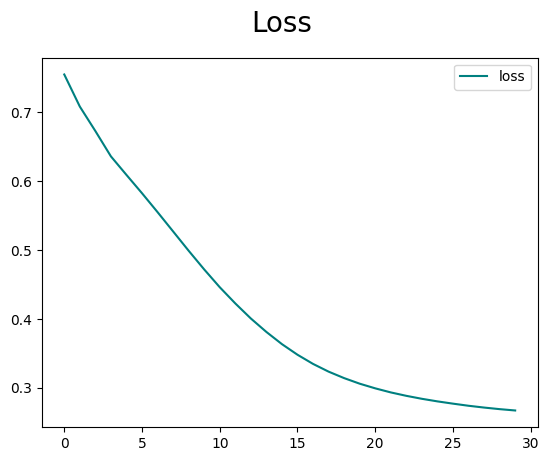

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(model1.history['loss'],color = 'teal',label = 'loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

#### Using validation set

In [17]:

hist2 = model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2680 - accuracy: 0.9339 - val_loss: 0.2387 - val_accuracy: 0.9238 - 587ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2667 - accuracy: 0.9328 - val_loss: 0.2348 - val_accuracy: 0.9381 - 421ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2655 - accuracy: 0.9312 - val_loss: 0.2330 - val_accuracy: 0.9381 - 395ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2642 - accuracy: 0.9339 - val_loss: 0.2312 - val_accuracy: 0.9381 - 376ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2630 - accuracy: 0.9339 - val_loss: 0.2301 - val_accuracy: 0.9381 - 363ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2623 - accuracy: 0.9365 - val_loss: 0.2295 - val_accuracy: 0.9381 - 391ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2610 - accuracy: 0.9339 - val_loss: 0.2277 - val_accuracy: 0.9476 - 392ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2601 - accuracy: 0.9360 - val_loss: 0.2275 - val_accuracy: 0.9381 - 419ms/epoch - 2ms/step


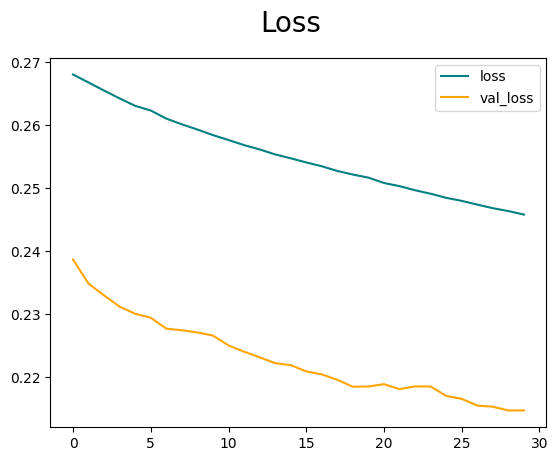

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(hist2.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist2.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

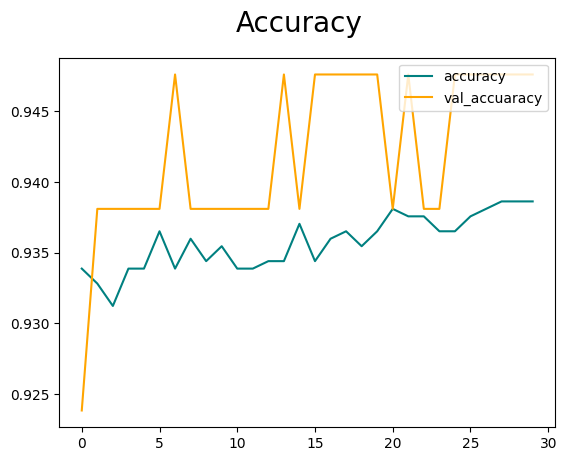

In [35]:
fig = plt.figure()
plt.plot(hist2.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist2.history['val_accuracy'],color='orange',label='val_accuaracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper right')
plt.show()

#### Process test data

In [19]:
test_labels = []
test_samples = []

In [20]:
for i in range(50):
    # The ~5% of older individuals whow did experience side effects 
    random_younger = random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    # The ~5% of older individuals whow did not experience side effects
    random_older = random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals whow did not experience side effects
    random_younger = random.randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    # The ~95% of older individuals whow did experience side effects
    random_older = random.randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [21]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
scaled_test_samples = scaler.transform(test_samples.reshape(-1,1))
test_lebels, test_samples = shuffle(test_labels, test_samples)

#### Predictions

In [22]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [23]:
for i in predictions:
    print(i)

[0.4653298 0.5346702]
[0.03439004 0.96560997]
[0.9588551  0.04114487]
[0.02822374 0.9717763 ]
[0.9086466  0.09135345]
[0.0202546 0.9797453]
[0.9619487  0.03805132]
[0.15778224 0.8422178 ]
[0.69445825 0.30554172]
[0.28764227 0.71235776]
[0.963205   0.03679499]
[0.0264176 0.9735824]
[0.65227526 0.34772474]
[0.10272235 0.8972776 ]
[0.7336137 0.2663863]
[0.3721783 0.6278217]
[0.9532754  0.04672455]
[0.01894849 0.98105145]
[0.9664519  0.03354809]
[0.07935617 0.9206438 ]
[0.9588551  0.04114487]
[0.05083223 0.9491678 ]
[0.7336137 0.2663863]
[0.15778224 0.8422178 ]
[0.9086466  0.09135345]
[0.03014952 0.9698504 ]
[0.9606512 0.0393488]
[0.04765024 0.9523497 ]
[0.41802323 0.58197683]
[0.3721783 0.6278217]
[0.7336137 0.2663863]
[0.06567561 0.9343244 ]
[0.51326823 0.48673174]
[0.32852283 0.6714772 ]
[0.96662307 0.03337692]
[0.10272235 0.8972776 ]
[0.9636148  0.03638514]
[0.3721783 0.6278217]
[0.9606512 0.0393488]
[0.15778224 0.8422178 ]
[0.56096417 0.43903583]
[0.07452885 0.9254711 ]
[0.9532754  0.

In [24]:
rounded_predictions = np.argmax(predictions,axis=-1)

In [ ]:
for i in rounded_predictions:
    print(i)

### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [28]:
"""def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Normalization can be applied by setting 'normalization=True'
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
"""

'def plot_confusion_matrix(cm, classes,\n                          normalize = False,\n                          title = \'Confusion matrix\',\n                          cmap=plt.cm.Blues):\n    \n    # Normalization can be applied by setting \'normalization=True\'\n    \n    plt.imshow(cm, interpolation=\'nearest\',cmap=cmap)\n    plt.title(title)\n    plt.colorbar()\n    tick_marks = np.arange(len(classes))\n    plt.xticks(tick_marks, classes, rotation = 45)\n    plt.yticks(tick_marks, classes)\n\n    if normalize:\n        cm = cm.astype(\'float\')/cm.sum(axis=1)[:,np.newaxis]\n        print("Normalized confusion matrix")\n    else:\n        print(\'Confusion matrix, without normalization\')\n    \n    print(cm)\n\n    thresh = cm.max()/2\n    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):\n        plt.text(j,i,cm[i,j],\n                 horizontalalignment="center",\n                 color="white" if cm[i,j]>thresh else "black")\n    \n    plt.tight_layout()\n

In [29]:
cm_plot_labels = ['no_side_effects','had_side_effects']
# plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

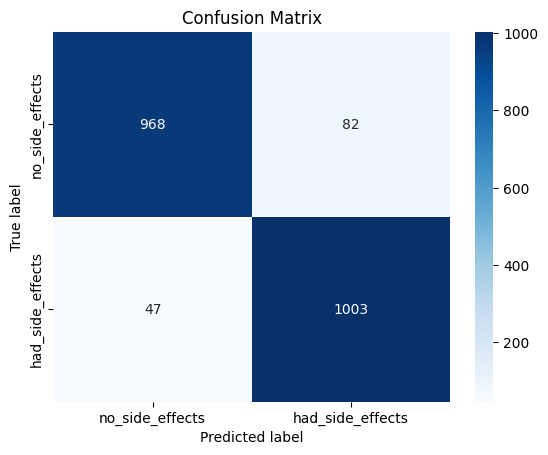

In [30]:
import seaborn as sns

plt.figsize=(6,6)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=cm_plot_labels,yticklabels=cm_plot_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Saving the model
#### 1.model.save()

In [31]:
# check if model already present with same name 
# if not save to disk

import os.path

if os.path.isfile('models/sample_nn.h5') is False:
    model.save('models/sample_nn.h5')
else:
    print('Model already present')

Model already present


##### This save functions saves:

    . The architecture of the model, allowing to re-create the model.
    . The weights of the model.
    . The training configuration(loss,optimizer).
    . The state of the optimizer, allowing to resume training exactly where you lef

#### Loading the model

In [32]:
from tensorflow.keras.models import load_model

new_model = load_model('models/sample_nn.h5')

TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[-0.45219725,  0.91925853, -0.5205984 ,  0.36485693, -0.37441325,
         -0.46006644, -0.07817322,  0.21476167, -0.22494802,  0.294506  ,
         -0.3477074 , -0.41995078, -0.34206185, -0.275019  ,  0.56433946,
         -0.03079337]], dtype=float32),
 array([ 0.        ,  0.16935256,  0.        , -0.54546666,  0.        ,
         0.        ,  0.        , -0.5814962 ,  1.112812  , -0.52735466,
         0.        ,  0.        ,  0.        ,  0.        ,  0.49471694,
         0.        ], dtype=float32),
 array([[ 0.05936974,  0.265694  ,  0.12267178, -0.30337983, -0.34722537,
         -0.33481616, -0.2760869 , -0.02966329,  0.01730567,  0.01632306,
         -0.08788839, -0.2709052 , -0.2612626 , -0.33921948, -0.21288128,
         -0.27816918, -0.1961833 ,  0.2666405 ,  0.13510704,  0.3083894 ,
          0.13272372, -0.05423388, -0.03606614,  0.30715635, -0.03214675,
         -0.13666925, -0.04062939,  0.19569615, -0.02536979, -0.2457312 ,
          0.07189596, -0.10496673],
 

In [ ]:
new_model.optimizer

#### 2. model.to_json()

##### If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only

In [ ]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()


In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [ ]:
# model reconstruction from JSON:

from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.kearas.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [ ]:
model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 3. model.save_weights()

In [ ]:
# check if model already present with same name 
# if not save to disk


if os.path.isfile('models/sample_nn_weights.h5') is False:
    model.save_weights('models/sample_nn_weights.h5')
else:
    print('Model already present')

Model already present


In [ ]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights('models/sample_nn_weights.h5')

In [ ]:
model2.get_weights()

[array([[-0.45219725,  0.91925853, -0.5205984 ,  0.36485693, -0.37441325,
         -0.46006644, -0.07817322,  0.21476167, -0.22494802,  0.294506  ,
         -0.3477074 , -0.41995078, -0.34206185, -0.275019  ,  0.56433946,
         -0.03079337]], dtype=float32),
 array([ 0.        ,  0.16935256,  0.        , -0.54546666,  0.        ,
         0.        ,  0.        , -0.5814962 ,  1.112812  , -0.52735466,
         0.        ,  0.        ,  0.        ,  0.        ,  0.49471694,
         0.        ], dtype=float32),
 array([[ 0.05936974,  0.265694  ,  0.12267178, -0.30337983, -0.34722537,
         -0.33481616, -0.2760869 , -0.02966329,  0.01730567,  0.01632306,
         -0.08788839, -0.2709052 , -0.2612626 , -0.33921948, -0.21288128,
         -0.27816918, -0.1961833 ,  0.2666405 ,  0.13510704,  0.3083894 ,
          0.13272372, -0.05423388, -0.03606614,  0.30715635, -0.03214675,
         -0.13666925, -0.04062939,  0.19569615, -0.02536979, -0.2457312 ,
          0.07189596, -0.10496673],
 